In [106]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [107]:
data = pd.read_csv('train (2).csv')

In [108]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [109]:
new = data['PassengerId'].str.split('_',expand  =True)

In [110]:
data["no_of_people"] = new[1]

In [111]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,no_of_people
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,01


In [112]:
data = data.drop('PassengerId',axis=1)

In [113]:
data = data.drop('Name',axis=1)

In [114]:
new1 = data['Cabin'].str.split('/',expand  =True)

In [115]:
new1.head()

,0,1,2
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


In [116]:
data["deck"] = new1[0]
data["num"] = new1[1]
data["side"] = new1[2]

In [117]:
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,no_of_people,deck,num,side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,01,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,01,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,01,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,02,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,01,F,1,S


In [118]:
data = data.drop('Cabin',axis=1)

In [119]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,no_of_people,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,01,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,01,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,01,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,02,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,01,F,1,S


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
 11  no_of_people  8693 non-null   object 
 12  deck          8494 non-null   object 
 13  num           8494 non-null   object 
 14  side          8494 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 959.4+ KB


In [121]:
data.isnull().sum()/len(data) * 100

HomePlanet      2.312205
CryoSleep       2.496261
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Transported     0.000000
no_of_people    0.000000
deck            2.289198
num             2.289198
side            2.289198
dtype: float64

In [122]:
data['no_of_people'] = pd.to_numeric(data['no_of_people'])

In [123]:
data['no_of_people']

0       1
1       1
2       1
3       2
4       1
       ..
8688    1
8689    1
8690    1
8691    1
8692    2
Name: no_of_people, Length: 8693, dtype: int64

In [124]:
cat_miss_cols = []
num_miss_cols = []

In [125]:
for i in data.columns:
        if data[i].isnull().sum()>0:
            if data[i].dtype == 'O':
                cat_miss_cols.append(i)
            else:
                num_miss_cols.append(i)
        

In [126]:
for i in cat_miss_cols:
    data[i] = data[i].fillna(data[i].mode()[0],axis=0)

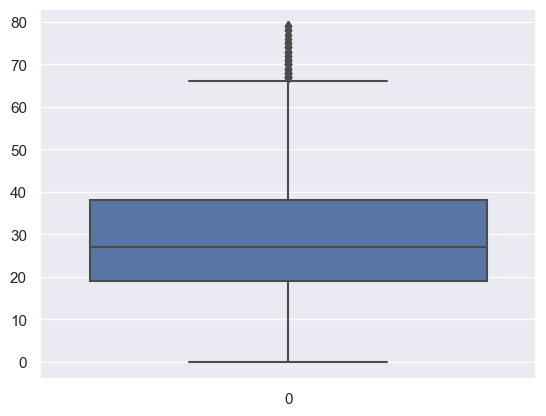

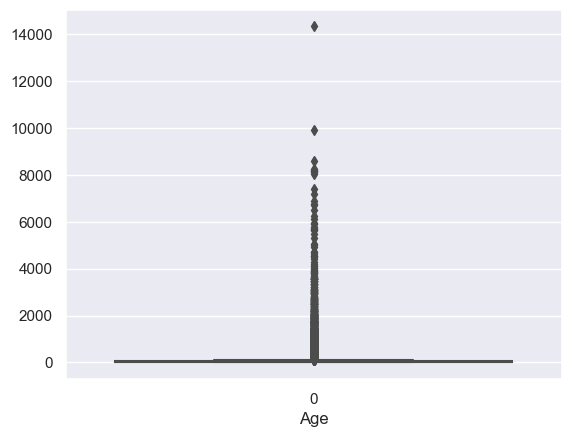

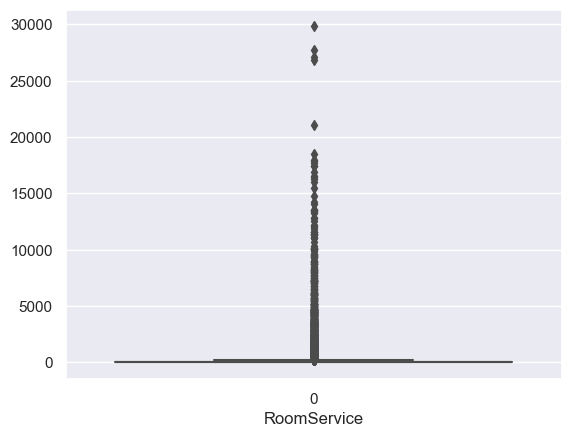

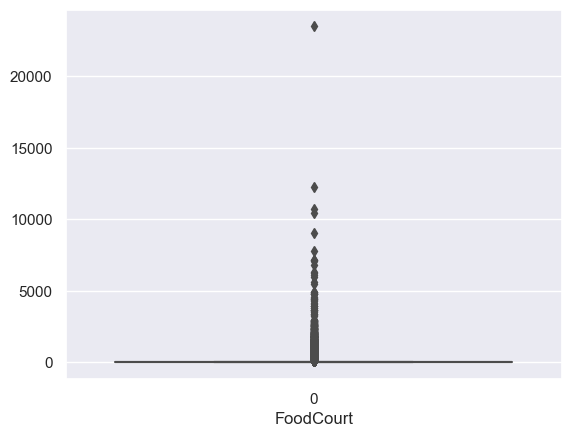

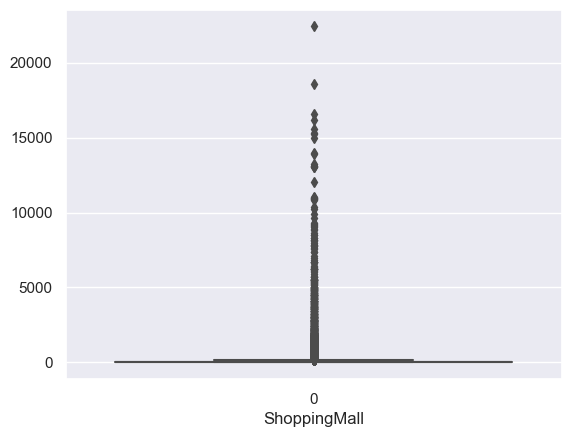

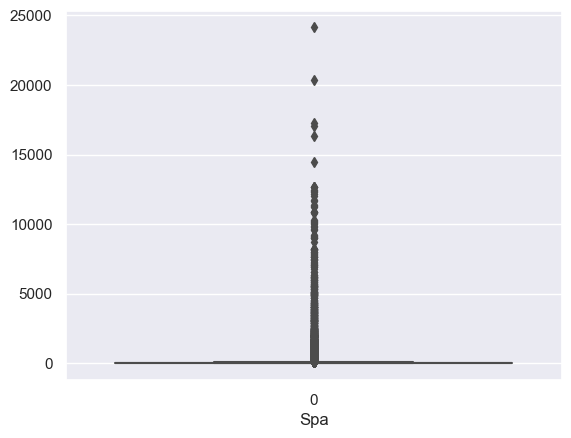

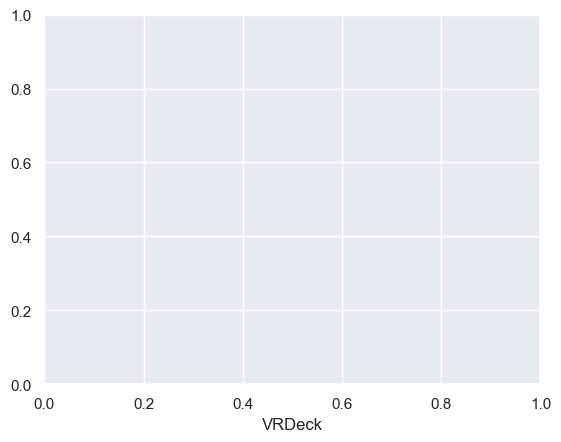

In [127]:
for i in num_miss_cols:
    sns.boxplot(data[i])
    plt.show()
    plt.xlabel(i)

In [128]:
num_miss_cols

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [129]:
data[num_miss_cols].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


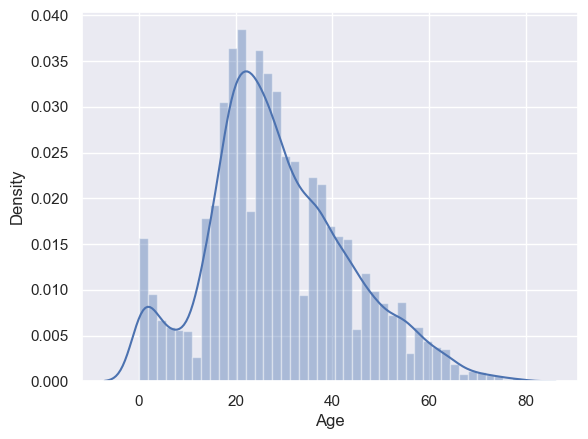

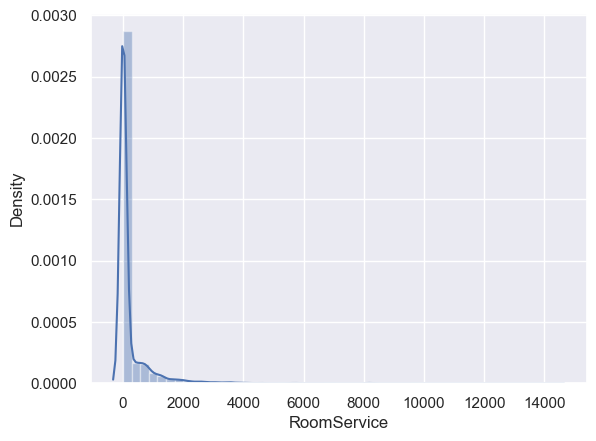

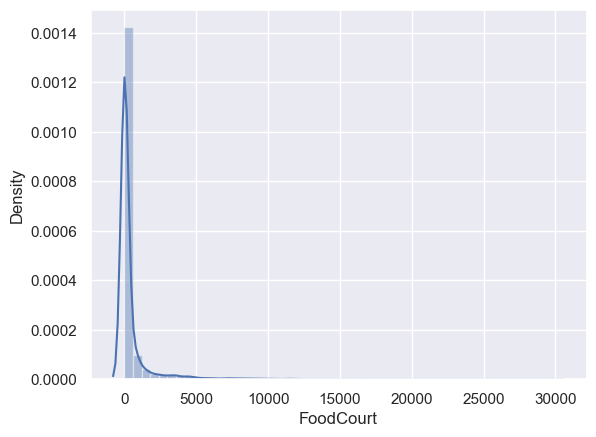

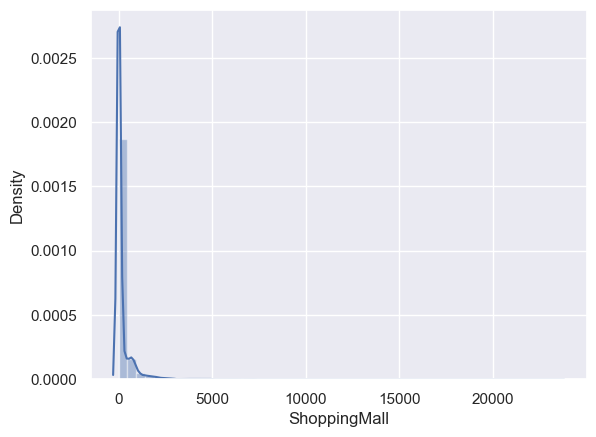

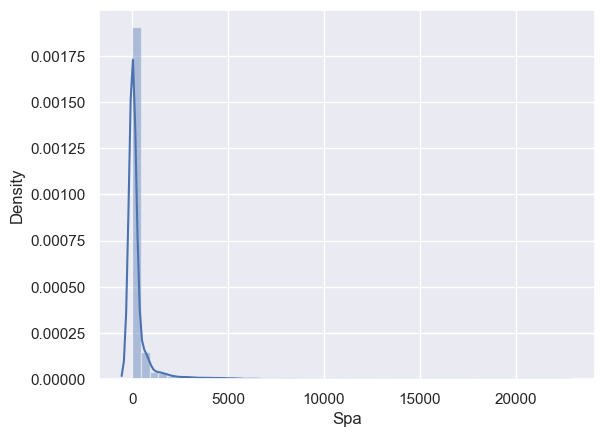

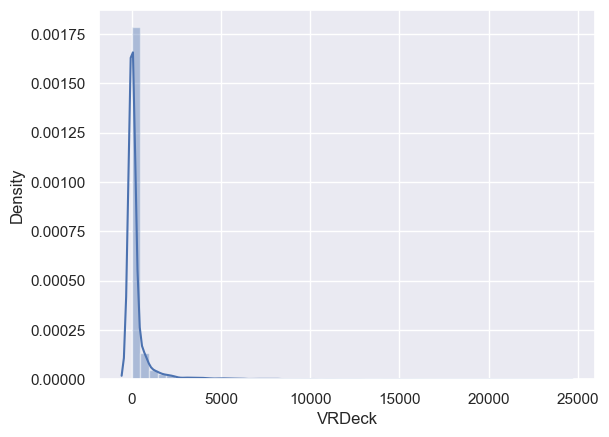

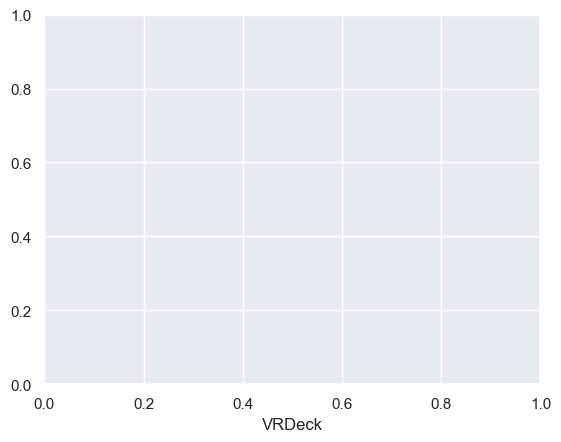

In [130]:
for i in num_miss_cols:
    sns.distplot(data[i])
    plt.show()
    plt.xlabel(i)

In [131]:
data[data['VRDeck'] > 3000]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,no_of_people,deck,num,side
73,Europa,False,TRAPPIST-1e,38.0,False,0.0,5840.0,0.0,321.0,9654.0,False,1,C,4,S
113,Earth,False,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,False,1,A,0,P
230,Europa,False,TRAPPIST-1e,33.0,False,0.0,86.0,796.0,584.0,10912.0,False,2,C,6,P
275,Europa,False,TRAPPIST-1e,28.0,False,0.0,422.0,0.0,1851.0,5166.0,False,1,E,18,S
335,Europa,False,55 Cancri e,63.0,False,0.0,1068.0,0.0,176.0,8188.0,False,1,C,15,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8588,Europa,False,55 Cancri e,36.0,False,23.0,14773.0,0.0,1159.0,7819.0,False,1,C,338,S
8604,Europa,False,55 Cancri e,34.0,False,0.0,5.0,11.0,62.0,5804.0,False,1,C,307,P
8613,Earth,False,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,False,1,E,603,S
8621,Europa,False,TRAPPIST-1e,41.0,True,0.0,7964.0,0.0,3238.0,5839.0,False,2,C,308,P


In [132]:
for i in num_miss_cols:
    data[i] = data[i].fillna(data[i].median(),axis=0)

In [133]:
data.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
no_of_people    0
deck            0
num             0
side            0
dtype: int64

In [134]:
for i in cat_miss_cols:
    if i == "deck" or i == "num":
        pass
    else:
        print(data[i].value_counts())

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
False    5656
True     3037
Name: CryoSleep, dtype: int64
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
False    8494
True      199
Name: VIP, dtype: int64
S    4487
P    4206
Name: side, dtype: int64


In [135]:
data = data.drop('num',axis=1)

In [136]:
data = data.drop('deck',axis=1)

In [137]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,no_of_people,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,S


In [140]:
data= pd.get_dummies(data = data,columns = ['HomePlanet','Destination'],drop_first = True)

In [141]:
data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,no_of_people,side,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,P,1,0,0,1
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,S,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,S,1,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,S,1,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,S,0,0,0,1


In [142]:
from sklearn.preprocessing import LabelEncoder

In [148]:
LB = LabelEncoder()
data['CryoSleep'] = LB.fit_transform(data['CryoSleep'])
data['VIP'] = LB.fit_transform(data['VIP'])
data['side'] = LB.fit_transform(data['side'])
data['Transported'] = LB.fit_transform(data['Transported'])

In [149]:
data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,no_of_people,side,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,1,1,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,2,1,1,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,1,0,0,0,1


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int64  
 9   no_of_people               8693 non-null   int64  
 10  side                       8693 non-null   int64  
 11  HomePlanet_Europa          8693 non-null   uint8  
 12  HomePlanet_Mars            8693 non-null   uint8  
 13  Destination_PSO J318.5-22  8693 non-null   uint8

In [152]:
x = data.drop('Transported',axis=1)
x.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,no_of_people,side,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1,1,1,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,2,1,1,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,1


In [153]:
y = data['Transported']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [154]:
y.value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

In [157]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2,random_state = 101)

In [158]:
from sklearn.linear_model import LogisticRegression
Logit = LogisticRegression()
Logit.fit(x_train,y_train)

LogisticRegression()

In [163]:
y_pred_train = Logit.predict(x_train)
y_pred_val = Logit.predict(x_val)

In [164]:
from sklearn.metrics import classification_report,confusion_matrix

In [165]:
print("The classification report for training data is :",classification_report(y_train,y_pred_train))
print("The classification report for validation data is :",classification_report(y_val,y_pred_val))

The classification report for training data is :               precision    recall  f1-score   support

           0       0.81      0.76      0.78      3438
           1       0.78      0.82      0.80      3516

    accuracy                           0.79      6954
   macro avg       0.79      0.79      0.79      6954
weighted avg       0.79      0.79      0.79      6954

The classification report for validation data is :               precision    recall  f1-score   support

           0       0.83      0.77      0.80       877
           1       0.78      0.84      0.81       862

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [168]:
# Cross Validation approach - K-Fold Method
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(Logit, x_train, y_train, cv=20)
test_accuracy = cross_val_score(Logit, x_val, y_val, cv=20)
print(training_accuracy)
print()
print(test_accuracy)
print()
print("Training Avg Accuracy", training_accuracy.mean())
print()
print("Test Avg Accuracy", test_accuracy.mean())

[0.79885057 0.82471264 0.77011494 0.80747126 0.78735632 0.78448276
 0.79310345 0.79022989 0.79310345 0.77586207 0.7816092  0.76149425
 0.74425287 0.75       0.80403458 0.78097983 0.78097983 0.78962536
 0.78962536 0.79538905]

[0.73563218 0.8045977  0.83908046 0.74712644 0.8045977  0.8045977
 0.7816092  0.7816092  0.83908046 0.82758621 0.74712644 0.79310345
 0.79310345 0.87356322 0.86206897 0.83908046 0.75862069 0.75862069
 0.86206897 0.75581395]

Training Avg Accuracy 0.7851638841962304

Test Avg Accuracy 0.8004343758353383


In [169]:
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_val, y_pred_val)
logit_roc_auc

0.8018979488712575

In [171]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val)
display(fpr[:10])
display(tpr[:10])
display(thresholds[:10])

array([0.        , 0.23147092, 1.        ])

array([0.        , 0.83526682, 1.        ])

array([2, 1, 0], dtype=int64)

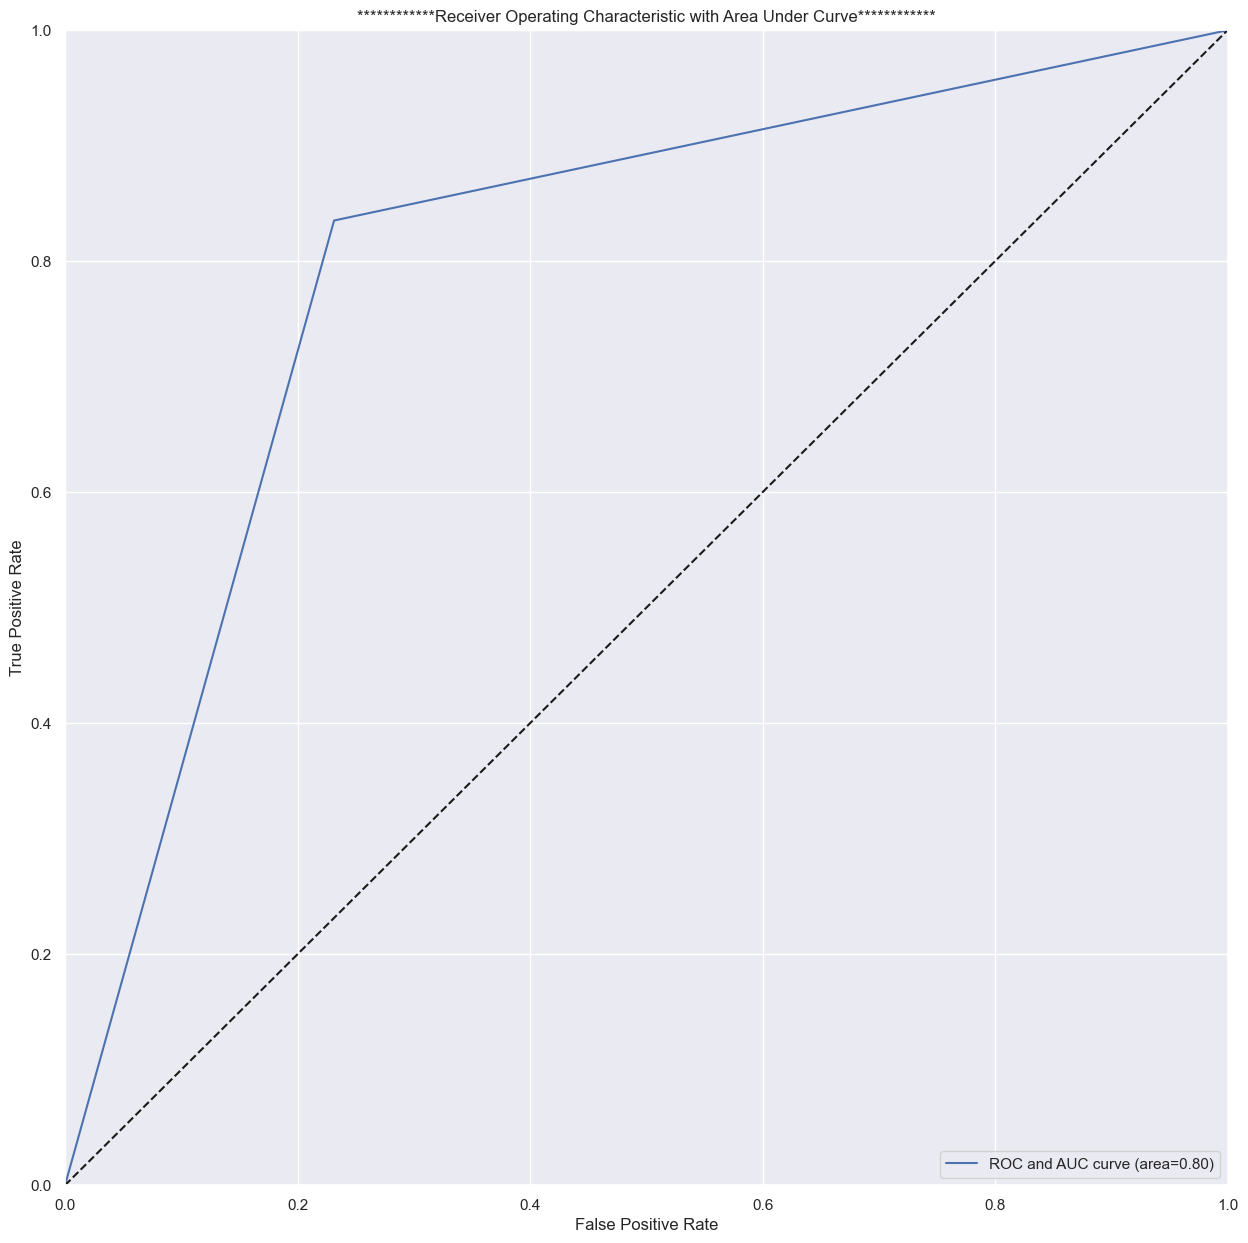

In [172]:
plt.figure(figsize=(15,15))
plt.plot(fpr, tpr, label="ROC and AUC curve (area=%0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("************Receiver Operating Characteristic with Area Under Curve************")
plt.legend(loc='lower right')
plt.show()